The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
f78b6fca34019eab
b0d11a549101ce83
76b75e9f7147fd17


/home/zcai75/github/multiple-ascent/plot_utils.py:75: UserWarning: var(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  dat_var = dat.flatten(0, 1).var(dim=0)


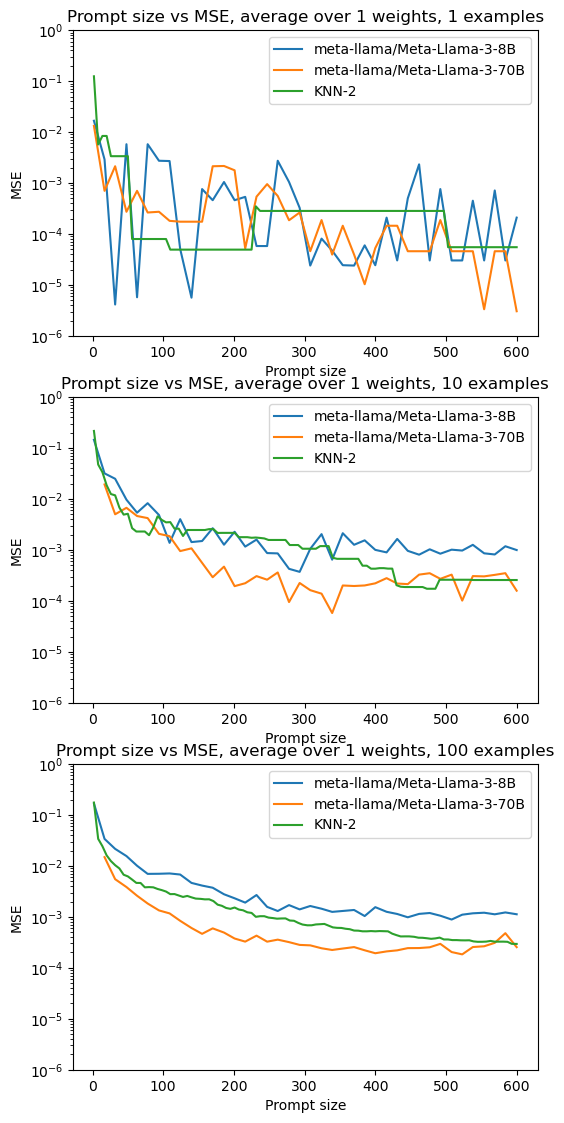

In [29]:
%load_ext autoreload
%autoreload 2

from plot_utils import pull_data, plot_2x2_avg
@dataclass
class ScriptArguments:
    # project arguments
    wandb_project: str = 'multiple-acsent'
    debug: bool = False
    out_dir: str = 'results'
    seed: int = 42
    device: str = 'cuda:0'

    # model arguments
    api: str | None = None
    model_name: str = "meta-llama/Meta-Llama-3-8B"
    batch_size: int | None = None
    max_new_tokens: int = 10

    # dataset arguments
    pz_end: int = 800
    pz_start: int = 20
    pz_count: int = 5
    pz_dist: str = 'uniform'
    num_test_examples: int = 100
    test_x_range: Optional[List[int]] = None

    input_dim: int = 2
    w_range: List[int] = field(default_factory=lambda: [0, 1000])
    x_range: List[int] = field(default_factory=lambda: [0, 1000])
    dataset_type: Literal['default', 'shuffle', 'preturb-context'] = 'default'
    
    same_last_example: bool = True
    
    def __post_init__(self):
        if self.test_x_range is None:
            self.test_x_range = self.x_range

def get_key(config):
    return (config.model_name)

api = 'togetherai'
seed_list = range(1)
max_xw = 1000
model_name_list = ['meta-llama/Meta-Llama-3-8B', 'meta-llama/Meta-Llama-3-70B']
num_test_examples = 100
arg_list = []
for seed in seed_list:
    for model_name in model_name_list:
        arg_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name,
                w_range=[0, max_xw],
                x_range=[0, max_xw],
                pz_end=600,
                pz_start=2,
                pz_dist='uniform',
                pz_count=40,
                num_test_examples=num_test_examples,
                device='cuda:1',
                dataset_type='default'
            )
        )

api = 'baseline'
seed_list = range(1)
# model_name_list = ['KNN-1', 'KNN-2', 'KNN-5', 'KNN-10', 'KNN-20']
model_name_list = ['KNN-2']
knn_args_list = []
for seed in seed_list:
    for model_name in model_name_list:
        knn_args_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name,
                w_range=[0, max_xw],
                x_range=[0, max_xw],
                pz_end=600,
                pz_start=int(model_name.split('-')[1]),
                pz_dist='uniform',
                pz_count=100,
                num_test_examples=num_test_examples,
                device='cuda:1',
                dataset_type='default'
            )
        )

results, configs = pull_data(arg_list + knn_args_list, get_key)
plot_2x2_avg(results, configs, x_list=[1, 10, 100], w_list=[1], logy=True, logx=False, decompose_mse=False)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0b253ac253366498
ee73f36111330d1f
c8ea61d8e1518622
aab6bf696f651ea2


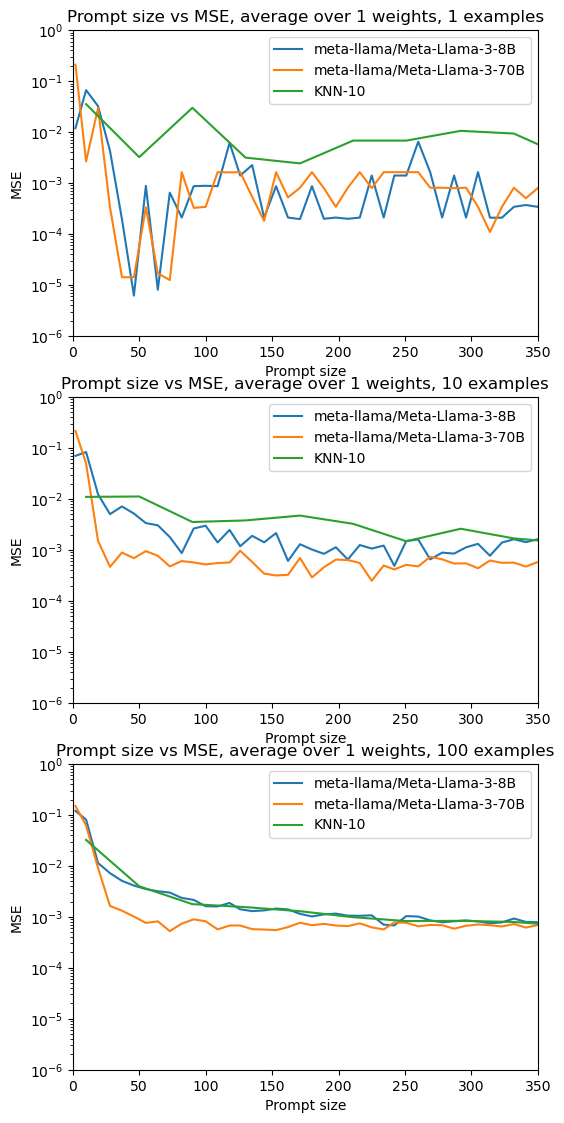

In [3]:
%load_ext autoreload
%autoreload 2

from plot_utils import pull_data, plot_2x2_avg
from run import ScriptArguments

def get_key(config):
    return (config.model_name)

api = 'togetherai'
seed_list = [1]
max_xw = 1000
model_name_list = ['meta-llama/Meta-Llama-3-8B', 'meta-llama/Meta-Llama-3-70B']
num_test_examples = 100
arg_list = []
for seed in seed_list:
    for model_name in model_name_list:
        arg_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name,
                w_range=[0, max_xw],
                x_range=[0, max_xw],
                input_dim=4,
                pz_end=350,
                pz_start=2,
                pz_dist='uniform',
                pz_count=40,
                num_test_examples=num_test_examples,
                device='cuda:1',
                dataset_type='default'
            )
        )

api = 'baseline'
seed_list = range(2)
# model_name_list = ['KNN-1', 'KNN-2', 'KNN-5', 'KNN-10', 'KNN-20']
model_name_list = ['KNN-10']
knn_args_list = []
for seed in seed_list:
    for model_name in model_name_list:
        knn_args_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name, 
                w_range=[0, max_xw],
                x_range=[0, max_xw],
                input_dim=4,
                pz_end=4000,
                pz_start=int(model_name.split('-')[1]),
                pz_dist='uniform',
                pz_count=100,
                num_test_examples=num_test_examples,
                device='cuda:1',
                dataset_type='default'
            )
        )

results, configs = pull_data(arg_list + knn_args_list, get_key)
plot_2x2_avg(results, configs, x_list=[1, 10, 100], w_list=[1], logy=True, logx=False, decompose_mse=False, pz_range=[0, 350])


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
97f137ae8ebf22c7
f60e07320b6c4496
6d3fff5f9b2048c7


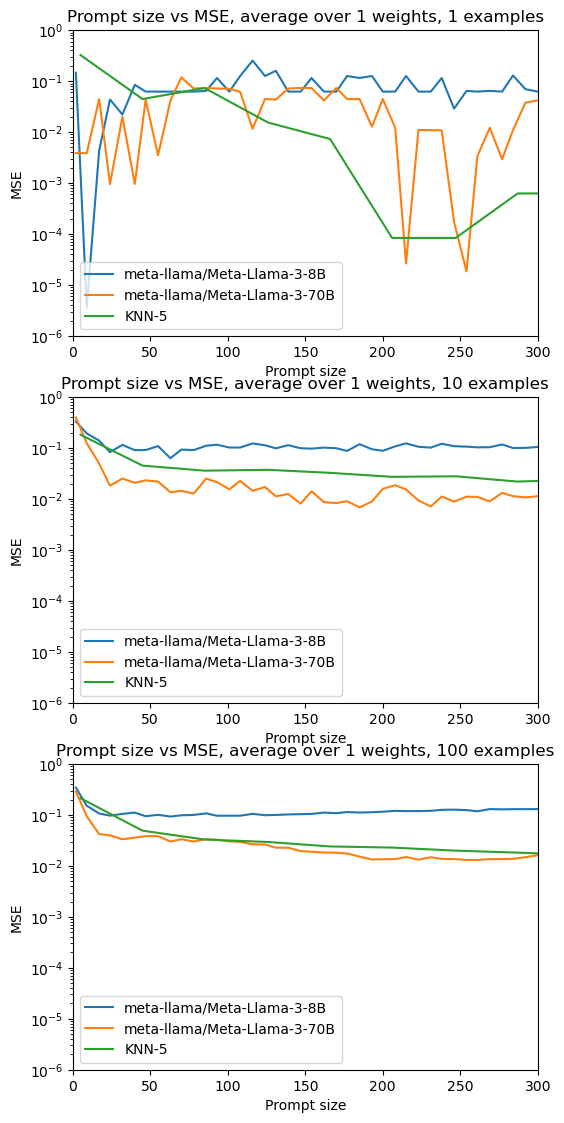

In [4]:
%load_ext autoreload
%autoreload 2

from plot_utils import pull_data, plot_2x2_avg
from run import ScriptArguments

def get_key(config):
    return (config.model_name)

api = 'togetherai'
seed_list = range(1)
max_xw = 1000
model_name_list = ['meta-llama/Meta-Llama-3-8B', 'meta-llama/Meta-Llama-3-70B']
num_test_examples = 100
arg_list = []
for seed in seed_list:
    for model_name in model_name_list:
        arg_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name,
                w_range=[0, max_xw],
                x_range=[0, max_xw],
                input_dim=6,
                pz_end=300,
                pz_start=2,
                pz_dist='uniform',
                pz_count=40,
                num_test_examples=num_test_examples,
                device='cuda:1',
                dataset_type='default'
            )
        )

api = 'baseline'
seed_list = range(1)
# model_name_list = ['KNN-1', 'KNN-2', 'KNN-5', 'KNN-10', 'KNN-20']
model_name_list = ['KNN-5']
knn_args_list = []
for seed in seed_list:
    for model_name in model_name_list:
        knn_args_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name,
                w_range=[0, max_xw],
                x_range=[0, max_xw],
                input_dim=6,
                pz_end=4000,
                pz_start=int(model_name.split('-')[1]),
                pz_dist='uniform',
                pz_count=100,
                num_test_examples=num_test_examples,
                device='cuda:1',
                dataset_type='default'
            )
        )

results, configs = pull_data(arg_list + knn_args_list, get_key)
plot_2x2_avg(results, configs, x_list=[1, 10, 100], w_list=[1], logy=True, logx=False, decompose_mse=False, pz_range=[0, 300])


a0775ba035e311d5
a5edd04c39f6b207


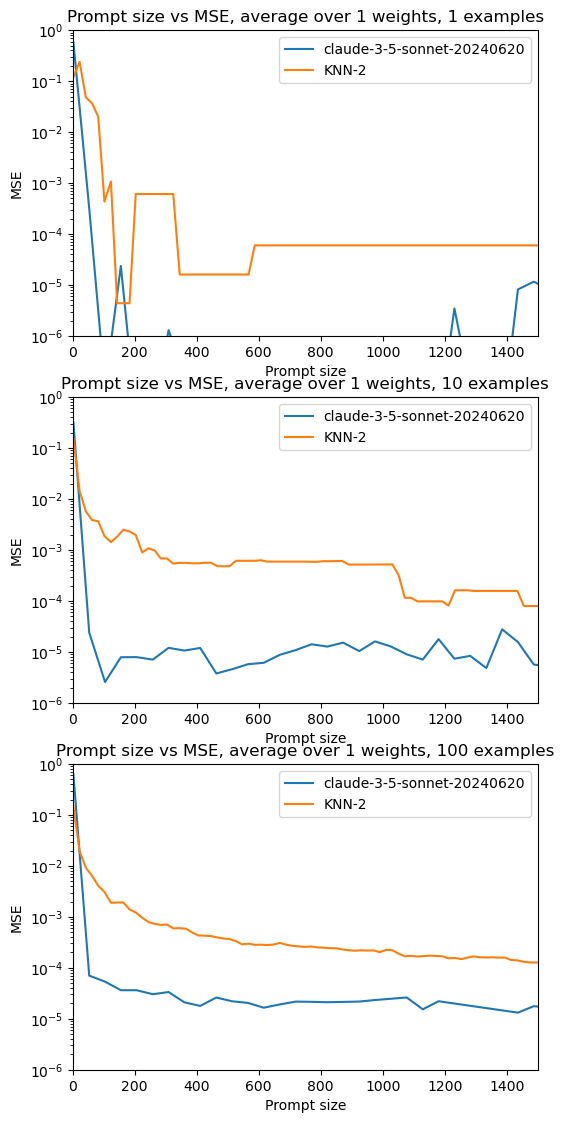

In [11]:
api = 'anthropic'
seed_list = range(1)
max_xw = 1000
model_name_list = ['claude-3-5-sonnet-20240620']
num_test_examples = 100
arg_list = []
for seed in seed_list:
    for model_name in model_name_list:
        arg_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name,
                input_dim=2,
                w_range=[0, max_xw],
                x_range=[0, max_xw],
                pz_end=2000,
                pz_start=2,
                pz_dist='uniform',
                pz_count=40,
                num_test_examples=num_test_examples,
                device='cuda:1',
                dataset_type='default'
            )
        )

api = 'baseline'
seed_list = range(1)
# model_name_list = ['KNN-1', 'KNN-2', 'KNN-5', 'KNN-10', 'KNN-20']
model_name_list = ['KNN-2']
knn_args_list = []
for seed in seed_list:
    for model_name in model_name_list:
        knn_args_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name,
                w_range=[0, max_xw],
                x_range=[0, max_xw],
                input_dim=2,
                pz_end=2000,
                pz_start=int(model_name.split('-')[1]),
                pz_dist='uniform',
                pz_count=100,
                num_test_examples=num_test_examples,
                device='cuda:1',
                dataset_type='default'
            )
        )

results, configs = pull_data(arg_list + knn_args_list, get_key)
plot_2x2_avg(results, configs, x_list=[1, 10, 100], w_list=[1], logx=False, logy=True, decompose_mse=False, pz_range=(0, 1500))


51db754e4bfdde0d
c8ea61d8e1518622


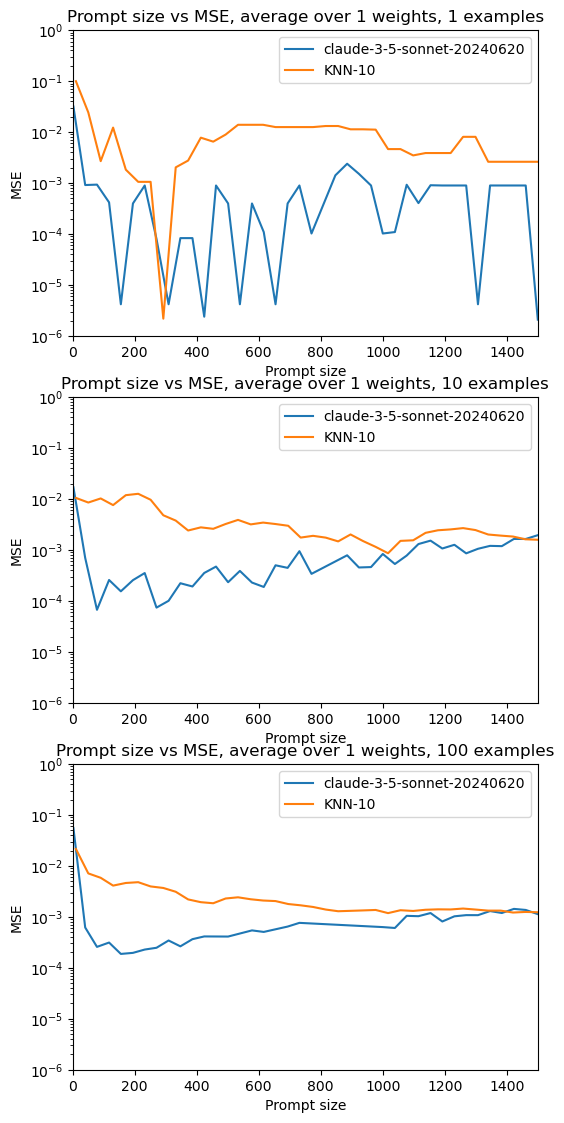

In [9]:
api = 'anthropic'
seed_list = range(1)
max_xw = 1000
model_name_list = ['claude-3-5-sonnet-20240620']
num_test_examples = 100
arg_list = []
for seed in seed_list:
    for model_name in model_name_list:
        arg_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name,
                input_dim=4,
                w_range=[0, max_xw],
                x_range=[0, max_xw],
                pz_end=1500,
                pz_start=2,
                pz_dist='uniform',
                pz_count=40,
                num_test_examples=num_test_examples,
                device='cuda:1',
                dataset_type='default'
            )
        )

api = 'baseline'
seed_list = range(1)
# model_name_list = ['KNN-1', 'KNN-2', 'KNN-5', 'KNN-10', 'KNN-20']
model_name_list = ['KNN-10']
knn_args_list = []
for seed in seed_list:
    for model_name in model_name_list:
        knn_args_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name,
                w_range=[0, max_xw],
                x_range=[0, max_xw],
                input_dim=4,
                pz_end=4000,
                pz_start=int(model_name.split('-')[1]),
                pz_dist='uniform',
                pz_count=100,
                num_test_examples=num_test_examples,
                device='cuda:1',
                dataset_type='default'
            )
        )

results, configs = pull_data(arg_list + knn_args_list, get_key)
plot_2x2_avg(results, configs, x_list=[1, 10, 100], w_list=[1], logx=False, logy=True, decompose_mse=False, pz_range=(0, 1500))


e0aed5d5128c086b
6d3fff5f9b2048c7


/home/zcai75/github/multiple-ascent/plot_utils.py:75: UserWarning: var(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  dat_var = dat.flatten(0, 1).var(dim=0)


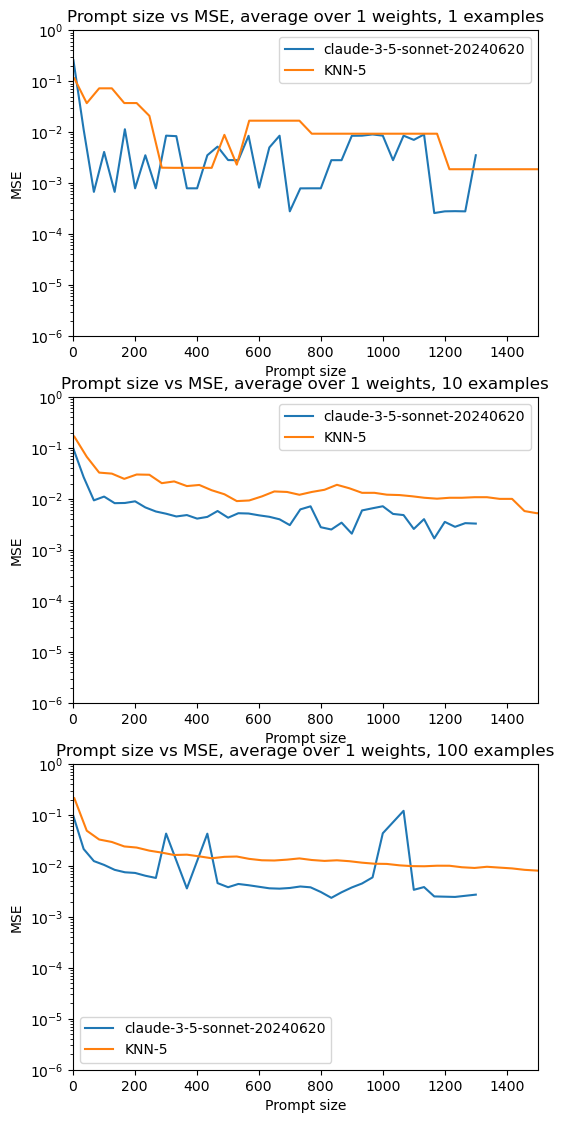

In [28]:
api = 'anthropic'
seed_list = range(1)
max_xw = 1000
model_name_list = ['claude-3-5-sonnet-20240620']
num_test_examples = 100
arg_list = []
for seed in seed_list:
    for model_name in model_name_list:
        arg_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name,
                input_dim=6,
                w_range=[0, max_xw],
                x_range=[0, max_xw],
                pz_end=1300,
                pz_start=2,
                pz_dist='uniform',
                pz_count=40,
                num_test_examples=num_test_examples,
                device='cuda:1',
                dataset_type='default'
            )
        )

api = 'baseline'
seed_list = range(1)
# model_name_list = ['KNN-1', 'KNN-2', 'KNN-5', 'KNN-10', 'KNN-20']
model_name_list = ['KNN-5']
knn_args_list = []
for seed in seed_list:
    for model_name in model_name_list:
        knn_args_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name,
                w_range=[0, max_xw],
                x_range=[0, max_xw],
                input_dim=6,
                pz_end=4000,
                pz_start=int(model_name.split('-')[1]),
                pz_dist='uniform',
                pz_count=100,
                num_test_examples=num_test_examples,
                device='cuda:1',
                dataset_type='default'
            )
        )

results, configs = pull_data(arg_list + knn_args_list, get_key)
plot_2x2_avg(results, configs, x_list=[1, 10, 100], w_list=[1], logx=False, logy=True, decompose_mse=False, pz_range=(0, 1500))


dbd04d4ebb6ed3e5
a5edd04c39f6b207


/home/zcai75/github/multiple-ascent/plot_utils.py:75: UserWarning: var(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  dat_var = dat.flatten(0, 1).var(dim=0)


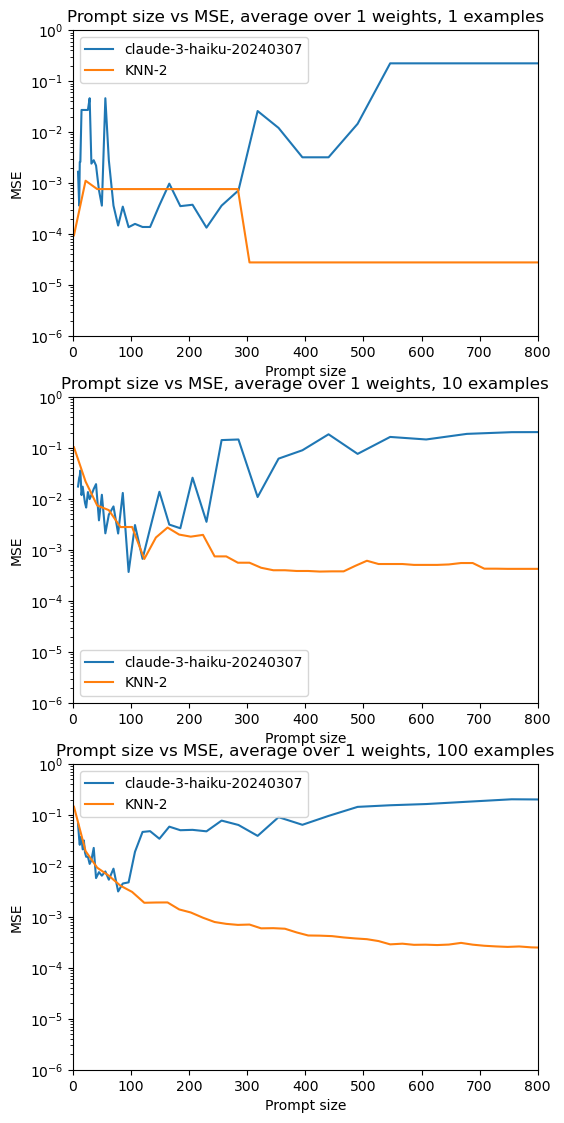

In [27]:
api = 'anthropic'
seed_list = range(1)
max_xw = 1000
model_name_list = ['claude-3-haiku-20240307']
num_test_examples = 100
arg_list = []
for seed in seed_list:
    for model_name in model_name_list:
        arg_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name,
                input_dim=2,
                w_range=[0, max_xw],
                x_range=[0, max_xw],
                pz_end=2000,
                pz_start=10,
                pz_dist='log',
                pz_count=50,
                num_test_examples=num_test_examples,
                device='cuda:1',
                dataset_type='default'
            )
        )

api = 'baseline'
seed_list = range(1)
# model_name_list = ['KNN-1', 'KNN-2', 'KNN-5', 'KNN-10', 'KNN-20']
model_name_list = ['KNN-2']
knn_args_list = []
for seed in seed_list:
    for model_name in model_name_list:
        knn_args_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name,
                w_range=[0, max_xw],
                x_range=[0, max_xw],
                pz_end=2000,
                pz_start=int(model_name.split('-')[1]),
                pz_dist='uniform',
                pz_count=100,
                num_test_examples=num_test_examples,
                device='cuda:1',
                dataset_type='default'
            )
        )

results, configs = pull_data(arg_list + knn_args_list, get_key)
plot_2x2_avg(results, configs, x_list=[1, 10, 100], w_list=[1], logx=False, logy=True, decompose_mse=False, pz_range=(0, 800))
